# Import thư viện

In [44]:
# Thư viện cơ bản
import pandas as pd
import numpy as np


# Thư viện vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# Bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Thư viện tiền xử lý dữ liệu
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# Thư viện mô hình
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Thư viện đánh giá mô hình
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
train.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,1
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,1
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,1
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,1


In [3]:
train.shape

(59381, 128)

In [28]:
test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(19765, 127)

# Tiền xử lý tập train

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,59381.0,39507.211515,22815.883089,2.0,19780.000000,39487.000000,59211.000000,79146.0
Product_Info_1,59381.0,1.026355,0.160191,1.0,1.000000,1.000000,1.000000,2.0
Product_Info_3,59381.0,24.415655,5.072885,1.0,26.000000,26.000000,26.000000,38.0
Product_Info_4,59381.0,0.328952,0.282562,0.0,0.076923,0.230769,0.487179,1.0
Product_Info_5,59381.0,2.006955,0.083107,2.0,2.000000,2.000000,2.000000,3.0
...,...,...,...,...,...,...,...,...
Medical_Keyword_45,59381.0,0.013691,0.116207,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_46,59381.0,0.008488,0.091737,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_47,59381.0,0.019905,0.139676,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_48,59381.0,0.054496,0.226995,0.0,0.000000,0.000000,0.000000,1.0


<Axes: xlabel='Response', ylabel='count'>

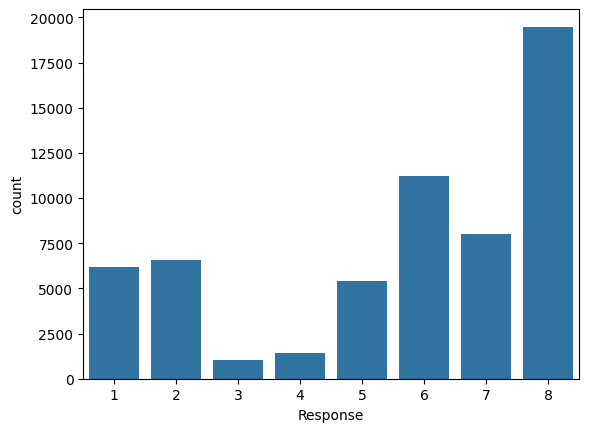

In [7]:
# Biểu đồ phân phối nhãn
sns.countplot(x = train['Response'])

# Nhãn khá lệch

In [8]:
# Gộp nhóm nhãn thành 3 nhóm
# Nhóm 0: 0-7
# Nhóm 1: 8
# Nhóm -1: nhãn còn lại (bất thường hoặc lỗi)
train['Modified_Response']  = train['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))

<Axes: xlabel='Modified_Response', ylabel='count'>

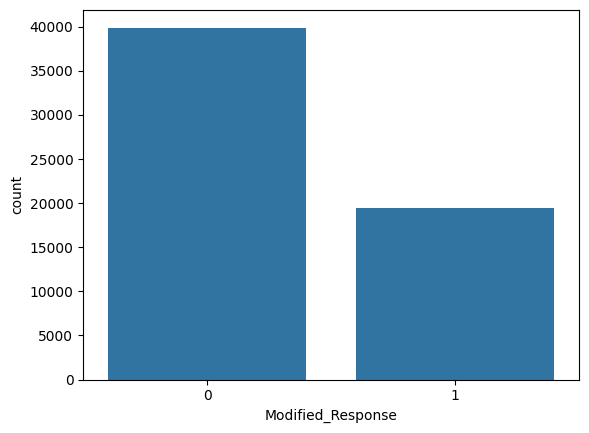

In [9]:
# Biểu đồ phân phối nhãn sau khi gộp nhóm
sns.countplot(x = train['Modified_Response'])

In [10]:
# Bỏ nhãn cũ
train.drop(['Response'], axis = 1, inplace = True)

In [ ]:
# Xem các cột null trong tập train
train_null_cols = train.isnull().sum()[train.isnull().sum() > 0]
train_null_cols

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_4          19184
Medical_History_1       8889
dtype: int64

In [ ]:
# Xem tỉ lệ các cột null trong tập train
train_null_cols / len(train) * 100

Employment_Info_1       0.031997
Employment_Info_4      11.416110
Employment_Info_6      18.278574
Insurance_History_5    42.767889
Family_Hist_2          48.257860
Family_Hist_4          32.306630
Medical_History_1      14.969435
dtype: float64

In [18]:
# Drop tất cả cột có tỉ lệ null >= 50%
train = train.loc[:, train.isnull().mean() <= 0.5]

In [ ]:
# Drop cột không có ý nghĩa nhiều
train.drop('Product_Info_2',axis=1,inplace=True)

In [21]:
# Fill null với trung vị
train = train.fillna(train.median())

# Tiền xử lý tập test

In [35]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,19765.0,39772.653883,22942.157493,1.0,19792.000000,39898.000000,59758.000000,79129.0
Product_Info_1,19765.0,1.024994,0.156110,1.0,1.000000,1.000000,1.000000,2.0
Product_Info_3,19765.0,24.321730,5.184879,2.0,26.000000,26.000000,26.000000,37.0
Product_Info_4,19765.0,0.324381,0.279439,0.0,0.076923,0.230769,0.487179,1.0
Product_Info_5,19765.0,2.006527,0.080526,2.0,2.000000,2.000000,2.000000,3.0
...,...,...,...,...,...,...,...,...
Medical_Keyword_44,19765.0,0.008247,0.090440,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_45,19765.0,0.013559,0.115655,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_46,19765.0,0.008601,0.092345,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_47,19765.0,0.018315,0.134092,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
# Xem các cột null trong tập test
test_null_cols = test.isnull().sum()[test.isnull().sum() > 0]
test_null_cols

Employment_Info_1          3
Employment_Info_4       2137
Employment_Info_6       3787
Insurance_History_5     8105
Family_Hist_2           9880
Family_Hist_3          11064
Family_Hist_4           6677
Family_Hist_5          13624
Medical_History_1       2972
Medical_History_10     19564
Medical_History_15     14864
Medical_History_24     18585
Medical_History_32     19414
dtype: int64

In [ ]:
# Xem tỉ lệ các cột null trong tập test
test_null_cols / len(test) * 100

Employment_Info_1       0.015178
Employment_Info_4      10.812041
Employment_Info_6      19.160132
Insurance_History_5    41.006830
Family_Hist_2          49.987351
Family_Hist_3          55.977738
Family_Hist_4          33.781938
Family_Hist_5          68.929927
Medical_History_1      15.036681
Medical_History_10     98.983051
Medical_History_15     75.203643
Medical_History_24     94.029851
Medical_History_32     98.224134
dtype: float64

In [39]:
# Drop tất cả cột có tỉ lệ null >= 50%
test = test.loc[:, test.isnull().mean() <= 0.5]

In [40]:
# Drop cột không có ý nghĩa nhiều
test.drop('Product_Info_2',axis=1,inplace=True)

In [41]:
# Fill null với trung vị
test = test.fillna(test.median())

# Chia Train, Validation

In [31]:
X = train.drop(['Modified_Response'], axis=1)
y = train['Modified_Response']

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Chạy mô hình